## ***Name: Prashant Jain***

# **GRIP (Graduate Rotational Internship Program)** - The Sparks Foundation

### Additional Task: **Computer Vision and Internet of Things**
Task From other domain

## **Color Identification in Images**
Implement an image color detector which identifies all the colors in an
image or video.

#### **Import libraries**

First we will import required libraries. 

1. numpy to work with arrays
2. cv2 to work with image data
3. matplotlib.pyplot for plotting graphs
4. sklearn for KMeans algorithm
5. collections to use Counter to count values

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
import os

The type of this input is <class 'numpy.ndarray'>
Shape: (512, 768, 3)


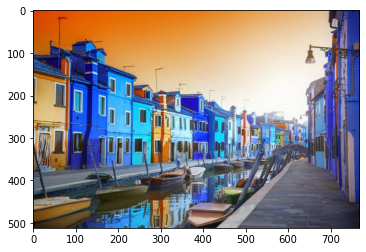

In [2]:
#Reading the image
image = cv2.imread('Colorful.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

The color of the image looks a bit off. This is because, by default, OpenCV reads image in the sequence Blue Green Red (BGR). Thus, to view the actual image we need to convert the rendering to Red Green Blue (RGB).

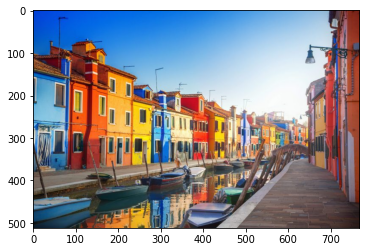

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

#### **Color Identification in image**

Now, we will be identifying colors from an image.

First, we will define a function that can give us the hex values of the colors which we will identify.

In [4]:
# COLOR IDNTIFICATION
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

KMeans expects flattened array as input during its fit method. Thus, we need to reshape the image using numpy. Then, we can apply KMeans to first fit and then predict on the image to get the results. Then, the cluster colors are identified an arranged in the correct order. We plot the colors as a pie chart.

I have combined all the steps in two method.

In [5]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [6]:
def get_colors(image, number_of_colors, show_chart):
    
    new_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    new_image = new_image.reshape(new_image.shape[0]*new_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(new_image)
    print(labels)
    
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[3 3 3 ... 5 5 5]


[array([112.5201331 ,  99.79773533,  98.20336589]),
 array([234.68213876, 149.71756602,  50.01202777]),
 array([ 88.25752605, 161.94997105, 221.96425125]),
 array([ 18.07502967, 105.84646829, 210.68616764]),
 array([155.20032184,  61.76231897,  40.50941591]),
 array([228.03224561, 235.40019309, 236.40899788]),
 array([57.21750051, 51.42173229, 55.34026791]),
 array([179.99781146, 157.08669044, 142.37091675]),
 array([159.00511073, 199.09241908, 228.28641397])]

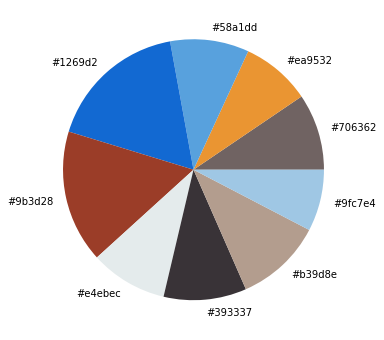

In [7]:
get_colors(get_image('Colorful.jpg'), 9, True)